# Numpy Arrays

Las listas de Python son elementos fundamentales y muy útiles pero hay ciertas operaciones que no podemos realizar con ellas.

Los numpy arrays son conocidos por ser estructuras de datos muy fáciles de emplear al almacenar datos dentro de Python.

Se les suelen atribuir dos características importantes:
- Todos los datos dentro de un numpy array deben ser de un mismo tipo. Si se intenta ingresar un dato de otro tipo, se forzará a ese dato a convertirse en el tipo de dato predominante.
- Pueden ser estructuras de una dimensión, de dos dimensiones, incluso de 7 dimensiones. Sin embargo, al menos en análisis de datos, siempre es mejor tratar con información en en forma matricial (dos dimensiones).

## Reglas básicas de los Numpy Arrays

**Solo pueden contener datos de un mismo tipo**: Si intentamos crear un arreglo de Numpy con datos de distintos tipos, Numpy "forzará" a todos los datos a ser de uno mismo.

In [4]:
np.array([1.0, 'is', True])

array(['1.0', 'is', 'True'], dtype='<U32')

**El operador + tiene un comportamiento diferente**: Si lo empleamos en listas, las concatenará. Si lo empleamos con arreglos, sumará los valores contenidos en ellos.

In [5]:
python_list = [1, 2, 3] # Lista
numpy_array = np.array([1, 2, 3]) # Arreglo Numpy

In [6]:
# Concatenando listas
python_list + python_list

[1, 2, 3, 1, 2, 3]

In [7]:
# Sumando arreglos
numpy_array + numpy_array

array([2, 4, 6])

## Problema: Calcular el BMI de un grupo de personas

Estamos realizando un estudio sobre la nutrición en un grupo de personas de determinada edad.

Formulando las primeras preguntas, nos hemos dado cuenta que necesitamos conocer el BMI de las personas involucradas. Desafortunadamente, no contamos con ese dato, pero podemos calcularlo a partir de los pesos y estaturas que hallamos en los registros del grupo.

Intentemos resolver este problema con listas:

In [8]:
# Generamos una nueva lista con las estaturas de las personas en el grupo
height = [1.73, 1.68, 1.71, 1.89, 1.79]
height

[1.73, 1.68, 1.71, 1.89, 1.79]

In [9]:
# Generamos una nueva lista con los pesos de las personas en el grupo
weight = [65.4, 59.2, 63.6, 88.4, 68.7]
weight

[65.4, 59.2, 63.6, 88.4, 68.7]

Para calcular el BMI, la fórmula es dividir el peso con la estatura, elevada al cuadrado:

In [10]:
# Sin embargo, no es posible realizar operaciones sobre los
# elementos de la lista de esta manera
weight / height ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

### Solución: Vamos a convertir nuestras listas en arreglos de Numpy

In [11]:
# Importar el paquete numpy como np
import numpy as np

# Crear 2 array numpy desde height y weight
np_height = np.array(height)
np_weight = np.array(weight)

Intentemos calcular el BMI de nuevo:

In [12]:
bmi = np_weight / np_height ** 2
bmi

array([21.85171573, 20.97505669, 21.75028214, 24.7473475 , 21.44127836])

## Muestreo (subsetting)

Tener nuestros datos en arrays de Numpy nos facilita las cosas al momento de consultar datos bajo ciertos criterios

In [13]:
bmi

array([21.85171573, 20.97505669, 21.75028214, 24.7473475 , 21.44127836])

In [14]:
bmi[1]

20.97505668934241

In [15]:
bmi > 23

array([False, False, False,  True, False])

In [16]:
bmi[bmi > 23]

array([24.7473475])

## Numpy arrays en 2 dimensiones

¿Cómo puedo saber si un arreglo de Numpy es de 1 o dos dimensiones?

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned | $1600 |

| Tables        | Are           | Cool |
|---------------|---------------|------|
| col 3 is      | right-aligned | 1600 |
| col 2 is      | centered      |   12 |
| zebra stripes | are neat      |    1 |

In [17]:
# Este es de una sola dimensión (arreglo)
type(np_height)

numpy.ndarray

Mira la principal diferencia, ahora, en lugar de utilizar un solo par de corchetes [], utilizamos pares de corchetes dentro de uno principal [[], [], [], ...]

Cada par interno podemos decir que es una "dimensión"

In [18]:
np_2d = np.array([[1.73, 1.68, 1.71, 1.89, 1.79],
[65.4, 59.2, 63.6, 88.4, 68.7]])

np_2d

array([[ 1.73,  1.68,  1.71,  1.89,  1.79],
       [65.4 , 59.2 , 63.6 , 88.4 , 68.7 ]])

In [19]:
np_2d.shape

(2, 5)

Recuerda, si intentas introducir un valor de un tipo distinto, podrías estar alterando el tipo de todos los elementos en el arreglo

In [21]:
np.array([[1.73, 1.68, 1.71, 1.89, 1.79],
[65.4, 59.2, 63.6, 88.4, "68.7"]])

array([['1.73', '1.68', '1.71', '1.89', '1.79'],
       ['65.4', '59.2', '63.6', '88.4', '68.7']], dtype='<U32')

## Muestreo en 2 dimensiones

In [22]:
# Una fila completa
np_2d[0]

array([1.73, 1.68, 1.71, 1.89, 1.79])

In [23]:
# El elemento en la primera fila, segunda columna
np_2d[0][2]

1.71

In [24]:
# El elemento en la primera fila, segunda columna con notación de coma
np_2d[0,2]

1.71

In [25]:
# Los elementos de todas las filas pero en las columnas 1, 2
np_2d[:,1:3]

array([[ 1.68,  1.71],
       [59.2 , 63.6 ]])

In [27]:
# Los elementos de la segunda fila pero todas las columnas (¿no te suena familiar?)
np_2d[1,:]

array([65.4, 59.2, 63.6, 88.4, 68.7])

## Estadística básica con Numpy

FIFA nos ha proveído amablemente de una base de datos con todo tipo de métricas acerca de jugadores en todos los equipos del mundo. Nosotros, la hemos pedido pues tenemos una corazonada: Creemos que los jugadores que juegan en la posición de portero, tienen en general una estatura mayor que el resto de jugadores, pero nadie nos cree :(

Utilizaremos [estos datos](https://assets.datacamp.com/production/repositories/288/datasets/026a5211b906ac118a09b1a0dbf7df48faafb379/fifa.csv) para comprobarlo:

In [42]:
# Importamos nuestros datos
import pandas as pd
data = pd.read_csv("https://assets.datacamp.com/production/repositories/288/datasets/026a5211b906ac118a09b1a0dbf7df48faafb379/fifa.csv") 
# Mostramos las columnas con las que contamos 
data.columns

Index(['id', ' name', ' rating', ' position', ' height', ' foot', ' rare',
       ' pace', ' shooting', ' passing', ' dribbling', ' defending',
       ' heading', ' diving', ' handling', ' kicking', ' reflexes', ' speed',
       ' positioning'],
      dtype='object')

In [46]:
# Convertimos las columnas a Numpy Arrays
np_positions = np.array(data[' position'])
np_heights = np.array(data[' height'])
np_positions

array([' GK', ' M', ' A', ..., ' D', ' D', ' M'], dtype=object)

In [48]:
# Heights de los goalkeepers (porteros): gk_heights
gk_heights = np_heights[np_positions == ' GK']

# Heights de los demás jugadores: other_heights
other_heights = np_heights[np_positions != ' GK']

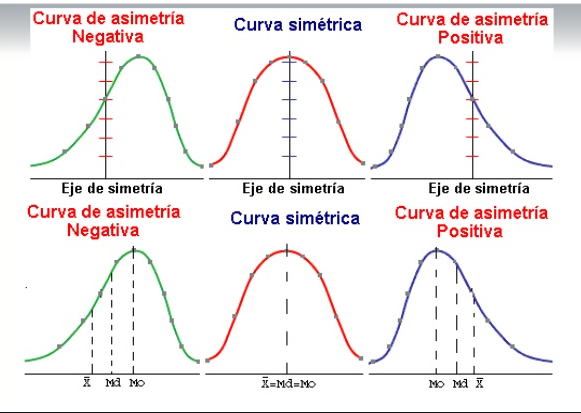

In [49]:
# Vamos a imprimir la mediana en la estatura de los porteros. Replace 'None'
print("Median height of goalkeepers: " + str(np.median(gk_heights)))

# Print out the median height of other players. Replace 'None'
print("Median height of other players: " + str(np.median(other_heights)))

Median height of goalkeepers: 188.0
Median height of other players: 181.0


# Enlaces:

Si tienes dudas sobre el uso de Markdown, puedes consultar el siguiente [link](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)